In [1]:
import sys
sys.path.append('../train')

In [2]:
from train import LitModel, LitDataModule, AlchemicalModel

In [3]:
N_PSEUDO = 4
CUTOFF = 5.0
HIDDEN_SIZES = [80, 80]
RADIAL_BASIS_CUTOFF = 250.0
PS_BASIS_CUTOFF = 180.0
ENERGIES_WEIGHT = 1.0
FORCES_WEIGHT = 1.0
TRAIN_VAL_TEST = [0.8, 0.1, 0.1]

In [4]:
datamodule = LitDataModule(
        "../data/bulk_random_data.xyz", batch_size=16, shuffle=False, verbose=True
)
datamodule.prepare_data()
datamodule.setup(stage="prepare")

Processing data: 100%|██████████| 10000/10000 [08:06<00:00, 20.55it/s]


In [5]:
model = AlchemicalModel(
    hidden_sizes=HIDDEN_SIZES,
    output_size=1,
    unique_numbers=datamodule.unique_numbers,
    cutoff=CUTOFF,
    basis_cutoff_radial_spectrum=RADIAL_BASIS_CUTOFF,
    basis_cutoff_power_spectrum=PS_BASIS_CUTOFF,
    num_pseudo_species=N_PSEUDO,
)

l_max = 10
[5 4 4 3 3 2 2 2 1 1 1]
Normalization check (needs to be close to 1): 1.0000000000000002
l_max = 8
[4 3 3 2 2 2 1 1 1]
Normalization check (needs to be close to 1): 1.0000000000000002


In [6]:
litmodel = LitModel.load_from_checkpoint('../train/lightning_logs/version_0/checkpoints/best_model.ckpt', model=model, energies_weight=ENERGIES_WEIGHT, forces_weight=FORCES_WEIGHT)

In [9]:
from torch_geometric.loader import DataLoader

In [14]:
datamodule.test_dataset

In [15]:
dataloader = DataLoader(datamodule.test_dataset, batch_size=len(datamodule.test_dataset), shuffle=False)

In [16]:
batch = next(iter(dataloader))

In [17]:
predicted_energies, predicted_forces = litmodel.model(batch)

In [18]:
target_energies = batch.energies
target_forces = batch.forces

In [19]:
import matplotlib.pyplot as plt

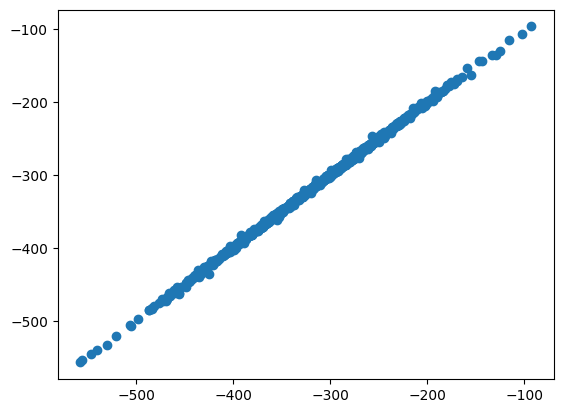

In [20]:
plt.scatter(target_energies.detach().numpy(), predicted_energies.detach().numpy())
plt.show()

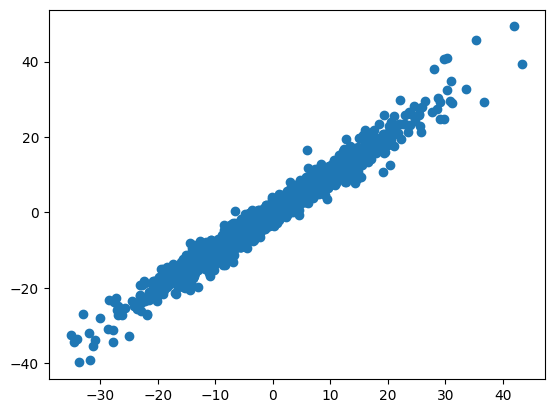

In [22]:
plt.scatter(target_forces.detach().flatten().numpy(), predicted_forces.detach().flatten().numpy())
plt.show()

In [24]:
import torch

In [77]:
n = np.linspace(0, 10, 100)
A = 1.0
B = 1.0
C = -1.0
sigma = A + C * np.exp(-B * n)

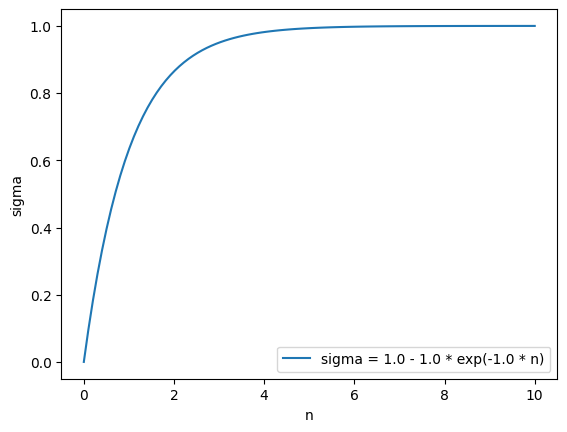

In [78]:
plt.plot(n, sigma, label='sigma = 1.0 - 1.0 * exp(-1.0 * n)')
plt.xlabel('n')
plt.ylabel('sigma')
plt.legend()
plt.show()